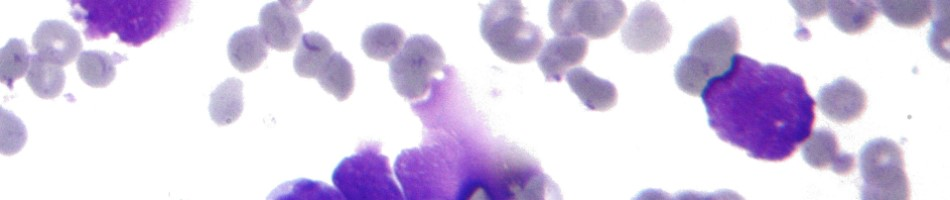

## **Avaliação 1** - Introdução ao Aprendizado de Máquina (ENGG67)

### **Professor:**  Antônio C. L. Fernandes Jr.

### **Estudantes:**  
 - Beatriz Pereira Espinheira
 - Djair Maykon de Novaes Miranda


In [ ]:
!pip install ucimlrepo
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import kurtosis, skew
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets


## **Sobre os Dados**

Os dados foram retirados do artigo **"Nuclear Feature Extraction for Breast Tumor Diagnosis"**, que descreve uma técnica de diagnóstico de tumores de mama usando FNA (**Punção Aspirativa por Agulha Fina**).

O processo descrito no artigo é:

1. Coleta de amostras de tumores por FNA e digitalização das imagens.
2. Marcação dos contornos dos núcleos celulares usando uma interface gráfica, refinados depois com "snakes" (**contornos ativos**) para maior precisão.
3. Extração de **10 características** de cada núcleo.

### As 10 características extraídas são:

- **Raio:**  
  Distância média do centro (centróide) até a borda do núcleo.

- **Perímetro:**  
  Comprimento total da borda do núcleo.

- **Área:**  
  Quantidade de espaço dentro da borda do núcleo.

- **Compacidade:**  
  Mede o quão compacto ou irregular é o núcleo.  
  Calculado como **(perímetro²) ÷ (área)**.

- **Suavidade:**  
  Mede o quanto a borda do núcleo é suave ou ondulada.

- **Concavidade:**  
  Mede a profundidade das entradas (depressões) na borda do núcleo.

- **Pontos de Concavidade:**  
  Conta quantas concavidades existem na borda do núcleo.

- **Simetria:**  
  Avalia o quanto o núcleo é simétrico de um lado para o outro.

- **Dimensão Fractal:**  
  Mede a complexidade e irregularidade do contorno do núcleo.

- **Textura:**  
  Mede a variação das tonalidades (tons de cinza) dentro do núcleo.

### Para cada característica foram calculados 3 tipos de medidas:

- **Tipo 1:**  
  Média dos valores observados nos núcleos da amostra.

- **Tipo 2:**  
  Erro padrão dos valores dos núcleos da amostra.

- **Tipo 3:**  
  Maior valor encontrado (considerado o "pior caso").

---


## **a.** O conjunto de dados é univariado ou multivariado? Descreva a quantidade de atributos preditivos e atributos alvo.
#### **Resposta:** O conjunto de dados é multivariado com 30 atributos preditivos e 1 atributo alvo.


In [ ]:
print("O número de atributos preditivos é:", X.shape[1])

print("O número de atributos alvo é: 1")

y.head()

O número de atributos preditivos é: 30
O número de atributos alvo é: 1


Diagnosis
0         M
1         M
2         M
3         M
4         M

## **b.** Caracterize os dados quanto ao Tipo e Escala;
### **Resposta:**
#### **Atributos Preditivos**
* **Tipos:** Os dados são quantitativos
* **Escala:** Os dados são contínuos (racionais/ escala razão)

#### **Atributo Alvo**
* **Tipos:** Os dados são qualitativos
* **Escala:** Os dados são Nominais Binários

In [ ]:
print(X.dtypes)
X.head()

radius1               float64
texture1              float64
perimeter1            float64
area1                 float64
smoothness1           float64
compactness1          float64
concavity1            float64
concave_points1       float64
symmetry1             float64
fractal_dimension1    float64
radius2               float64
texture2              float64
perimeter2            float64
area2                 float64
smoothness2           float64
compactness2          float64
concavity2            float64
concave_points2       float64
symmetry2             float64
fractal_dimension2    float64
radius3               float64
texture3              float64
perimeter3            float64
area3                 float64
smoothness3           float64
compactness3          float64
concavity3            float64
concave_points3       float64
symmetry3             float64
fractal_dimension3    float64
dtype: object


radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0      0.3001          0.14710     0.2419             0.07871  ...    25.38   
1      0.0869          0.07017     0.1812             0.05667  ...    24.99   
2      0.1974          0.12790     0.2069             0.05999  ...    23.57   
3      0.2414          0.10520     0.2597             0.09744  ...    14.91   
4      0.1980          0.10430     0.1809             0.05883  ...    22.54   

   texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
0     17.33      184.60  2019.0       0.1622        0.6656      0.7119   
1     23.41      158.80  1956.0       0.1238        0.1866      0.2416   
2     25.53      152.50  1709.0       0.1444        0.4245      0.4504   
3     26.50       98.87   567.7       0.2098        0.8663      0.6869   
4     16.67      152.20  1575.0       0.1374        0.2050      0.4000   

   concave_points3  symmetry3  fractal_dimension3  
0           0.2654     0.4601             0.11890  
1           0.1860     0.2750             0.08902  
2           0.2430     0.3613             0.08758  
3           0.2575     0.6638             0.17300  
4           0.1625     0.2364             0.07678  

[5 rows x 30 columns]

## **c.** Verifique a necessidade de balanceamento dos dados e caracterize estatisticamente os dados.
### (calcule, para cada atributo, suas estatísticas univariadas pertinentes dentre frequência,moda, média, mediana, desvio-padrão, Q1, Q3, obliquidade e curtose).

In [ ]:
print(y.value_counts())
print(y.value_counts(normalize=True))

Diagnosis
B            357
M            212
Name: count, dtype: int64
Diagnosis
B            0.627417
M            0.372583
Name: proportion, dtype: float64


Como a proporção de tumores **cancerígenos** (aproximadamente 37%) e **não-cancerígenos** (aproximadamente 63%) é diferente, talvez haja a necessidade de balanceamento de dados. Isso porque um dataset desbalanceado pode priorizar a classe majoritária (no caso, os tumores benignos) e deixar de detectar tumores malignos o que pode ser grave.

In [ ]:
estatisticas = []

for coluna in X.columns:
    dados = X[coluna]
    estatisticas.append({
        'Atributo': coluna,
        'Frequência (não-nulos)': dados.count(),
        'Média': dados.mean(),
        'Mediana': dados.median(),
        'Desvio-Padrão': dados.std(),
        'Q1': dados.quantile(0.25),
        'Q3': dados.quantile(0.75),
        'Obliquidade (Skew)': skew(dados),
        'Curtose (Kurtosis)': kurtosis(dados)
    })

estatisticas_df = pd.DataFrame(estatisticas)
estatisticas_df


Atributo  Frequência (não-nulos)       Média     Mediana  \
0              radius1                     569   14.127292   13.370000   
1             texture1                     569   19.289649   18.840000   
2           perimeter1                     569   91.969033   86.240000   
3                area1                     569  654.889104  551.100000   
4          smoothness1                     569    0.096360    0.095870   
5         compactness1                     569    0.104341    0.092630   
6           concavity1                     569    0.088799    0.061540   
7      concave_points1                     569    0.048919    0.033500   
8            symmetry1                     569    0.181162    0.179200   
9   fractal_dimension1                     569    0.062798    0.061540   
10             radius2                     569    0.405172    0.324200   
11            texture2                     569    1.216853    1.108000   
12          perimeter2                     569    2.866059    2.287000   
13               area2                     569   40.337079   24.530000   
14         smoothness2                     569    0.007041    0.006380   
15        compactness2                     569    0.025478    0.020450   
16          concavity2                     569    0.031894    0.025890   
17     concave_points2                     569    0.011796    0.010930   
18           symmetry2                     569    0.020542    0.018730   
19  fractal_dimension2                     569    0.003795    0.003187   
20             radius3                     569   16.269190   14.970000   
21            texture3                     569   25.677223   25.410000   
22          perimeter3                     569  107.261213   97.660000   
23               area3                     569  880.583128  686.500000   
24         smoothness3                     569    0.132369    0.131300   
25        compactness3                     569    0.254265    0.211900   
26          concavity3                     569    0.272188    0.226700   
27     concave_points3                     569    0.114606    0.099930   
28           symmetry3                     569    0.290076    0.282200   
29  fractal_dimension3                     569    0.083946    0.080040   

    Desvio-Padrão          Q1           Q3  Obliquidade (Skew)  \
0        3.524049   11.700000    15.780000            0.939893   
1        4.301036   16.170000    21.800000            0.648734   
2       24.298981   75.170000   104.100000            0.988037   
3      351.914129  420.300000   782.700000            1.641391   
4        0.014064    0.086370     0.105300            0.455120   
5        0.052813    0.064920     0.130400            1.186983   
6        0.079720    0.029560     0.130700            1.397483   
7        0.038803    0.020310     0.074000            1.168090   
8        0.027414    0.161900     0.195700            0.723695   
9        0.007060    0.057700     0.066120            1.301047   
10       0.277313    0.232400     0.478900            3.080464   
11       0.551648    0.833900     1.474000            1.642100   
12       2.021855    1.606000     3.357000            3.434530   
13      45.491006   17.850000    45.190000            5.432816   
14       0.003003    0.005169     0.008146            2.308344   
15       0.017908    0.013080     0.032450            1.897202   
16       0.030186    0.015090     0.042050            5.096981   
17       0.006170    0.007638     0.014710            1.440867   
18       0.008266    0.015160     0.023480            2.189342   
19       0.002646    0.002248     0.004558            3.913617   
20       4.833242   13.010000    18.790000            1.100205   
21       6.146258   21.080000    29.720000            0.497007   
22      33.602542   84.110000   125.400000            1.125188   
23     569.356993  515.300000  1084.000000            1.854468   
24       0.022832    0.116600     0.146000            0.414330   
25 

### **Alguns Insights Obtidos**

- **Distribuições Assimétricas:**  
  Muitos atributos, como **radius1**, **perimeter1** e **area1**, apresentam assimetria positiva (oblíquidade).  Isso indica que a cauda da distribuição é mais longa para a direita.
  Isso faz sentido nesse conjunto de dados já que a maioria dos tumores é **benigna**, concentrando os valores em faixas mais baixas. Como, nesse caso, valores mais altos costumam indicar maior chance de malignidade (cerca de 30% do dataset), faz sentido que existam distribuições assimétricas.

- **Outliers:**  
  Alguns atributos exibem **curtose** (caudas) muito alta, sugerindo distribuições com picos estreitos e caudas longas.  
  Isso é um forte indicativo da presença de **outliers** nos dados, no entanto também devemos considerar as distribuições por classes.

- **Padrões Semelhantes:**  
  Alguns atributos parecem estar **correlacionados** como **raio**, **perímetro** e **área** que apresentam distribuições semelhantes, o que faz sentido, já que essas medidas estão relacionadas ao tamanho dos núcleos presentes nas amostras.


## **d.** Analise os dados quanto a sua incompletude, inconsistências, redundâncias e presença de ruídos.

### **Incompletude:** Os dados estão completos pois não há valores ausentes.

In [ ]:
X.isnull().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

### **Redundância:** Os dados aparentemente não tem linhas iguais porém possuem alguns atributos redundantes (com forte correlação). A seguir alguns **scatter plots** ilustram a alta correlação (>0.9) entre alguns atributos e possível redundãncia.

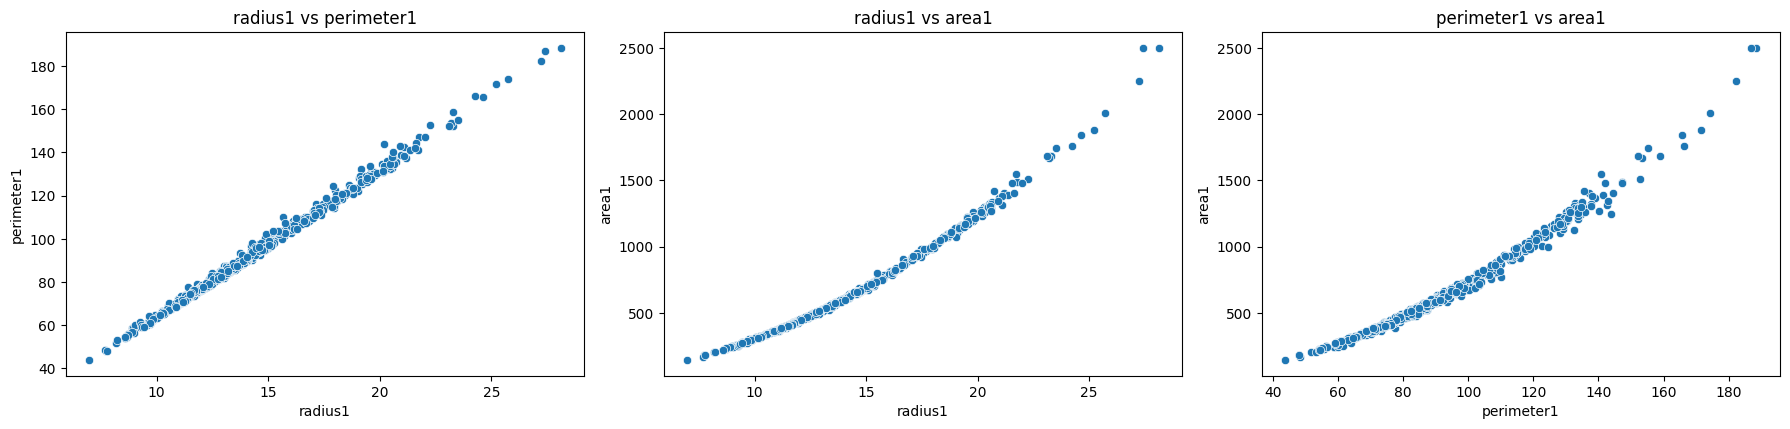

In [ ]:
X[X.duplicated()]

plt.figure(figsize=(18, 12))

plt.subplot(3, 3, 1)
sns.scatterplot(data=X, x='radius1', y='perimeter1')
plt.title('radius1 vs perimeter1')

plt.subplot(3, 3, 2)
sns.scatterplot(data=X, x='radius1', y='area1')
plt.title('radius1 vs area1')

plt.subplot(3, 3, 3)
sns.scatterplot(data=X, x='perimeter1', y='area1')
plt.title('perimeter1 vs area1')

plt.tight_layout()
plt.show()

### **Inconsistência:** A principal inconsistência observada nos dados foi a presença de atributos do tipo 3 (maior valor ou pior valor) com valores iguais aos atributos do tipo 1 (média dos valores), mesmo apresentando erro padrão positivo. Não conseguimos identificar o motivo dessa situação pois a existência de erro padrão indica variação entre os núcleos analisados, o que deveria resultar em diferenças entre a média e o maior valor.

In [ ]:
atributos_base = ['radius', 'texture', 'perimeter', 'area', 'smoothness',
                  'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension']

erros_detectados = []

for atributo in atributos_base:
    col_mean = f'{atributo}1'
    col_se = f'{atributo}2'
    col_worst = f'{atributo}3'

    for idx, row in X.iterrows():
        if (row[col_worst] <= row[col_mean]) and (row[col_worst]!=0) :
            erros_detectados.append({
                'linha': idx,
                'atributo': atributo,
                'mean': row[col_mean],
                'se': row[col_se],
                'worst': row[col_worst]
            })

if not erros_detectados:
    print("Nenhuma inconsistência encontrada: Todos os atributos estão corretos!")
else:
    print(f"Foram encontradas {len(erros_detectados)} inconsistências:\n")
    for erro in erros_detectados:
        print(f"Linha {erro['linha']} - Atributo: {erro['atributo'].upper()}")
        print(f"  mean ({erro['mean']:.3f})")
        print(f"  se ({erro['se']:.3f})")
        print(f"  worst ({erro['worst']:.3f})\n")


Foram encontradas 20 inconsistências:

Linha 38 - Atributo: RADIUS
  mean (14.990)
  se (1.214)
  worst (14.990)

Linha 212 - Atributo: RADIUS
  mean (28.110)
  se (2.873)
  worst (28.110)

Linha 38 - Atributo: TEXTURE
  mean (25.200)
  se (2.188)
  worst (25.200)

Linha 212 - Atributo: TEXTURE
  mean (18.470)
  se (1.476)
  worst (18.470)

Linha 38 - Atributo: PERIMETER
  mean (95.540)
  se (8.077)
  worst (95.540)

Linha 212 - Atributo: PERIMETER
  mean (188.500)
  se (21.980)
  worst (188.500)

Linha 38 - Atributo: AREA
  mean (698.800)
  se (106.000)
  worst (698.800)

Linha 212 - Atributo: AREA
  mean (2499.000)
  se (525.600)
  worst (2499.000)

Linha 38 - Atributo: SMOOTHNESS
  mean (0.094)
  se (0.007)
  worst (0.094)

Linha 212 - Atributo: SMOOTHNESS
  mean (0.114)
  se (0.013)
  worst (0.114)

Linha 38 - Atributo: COMPACTNESS
  mean (0.051)
  se (0.011)
  worst (0.051)

Linha 212 - Atributo: COMPACTNESS
  mean (0.152)
  se (0.028)
  worst (0.152)

Linha 38 - Atributo: CONCAVI

### **Ruido**: É possível observar alguns valores destoantes em cada coluna dos boxplots traçados na letra **f.** o que poderia ser indicativo de ruído.

Por exemplo, no atributo "smoothness1" um tumor classificado como benigno exibe a média de contorno de núcleos mais irregular entre todas as amostras(tipicamente turmores malignos que apresentam valores maiores) isso significa um forte indicativo de ruído nos dados.

## **e.** Calcule estatísticas multivariadas de covariância e correlação para os atributos quantitativos presentes. Interprete os valores obtidos.

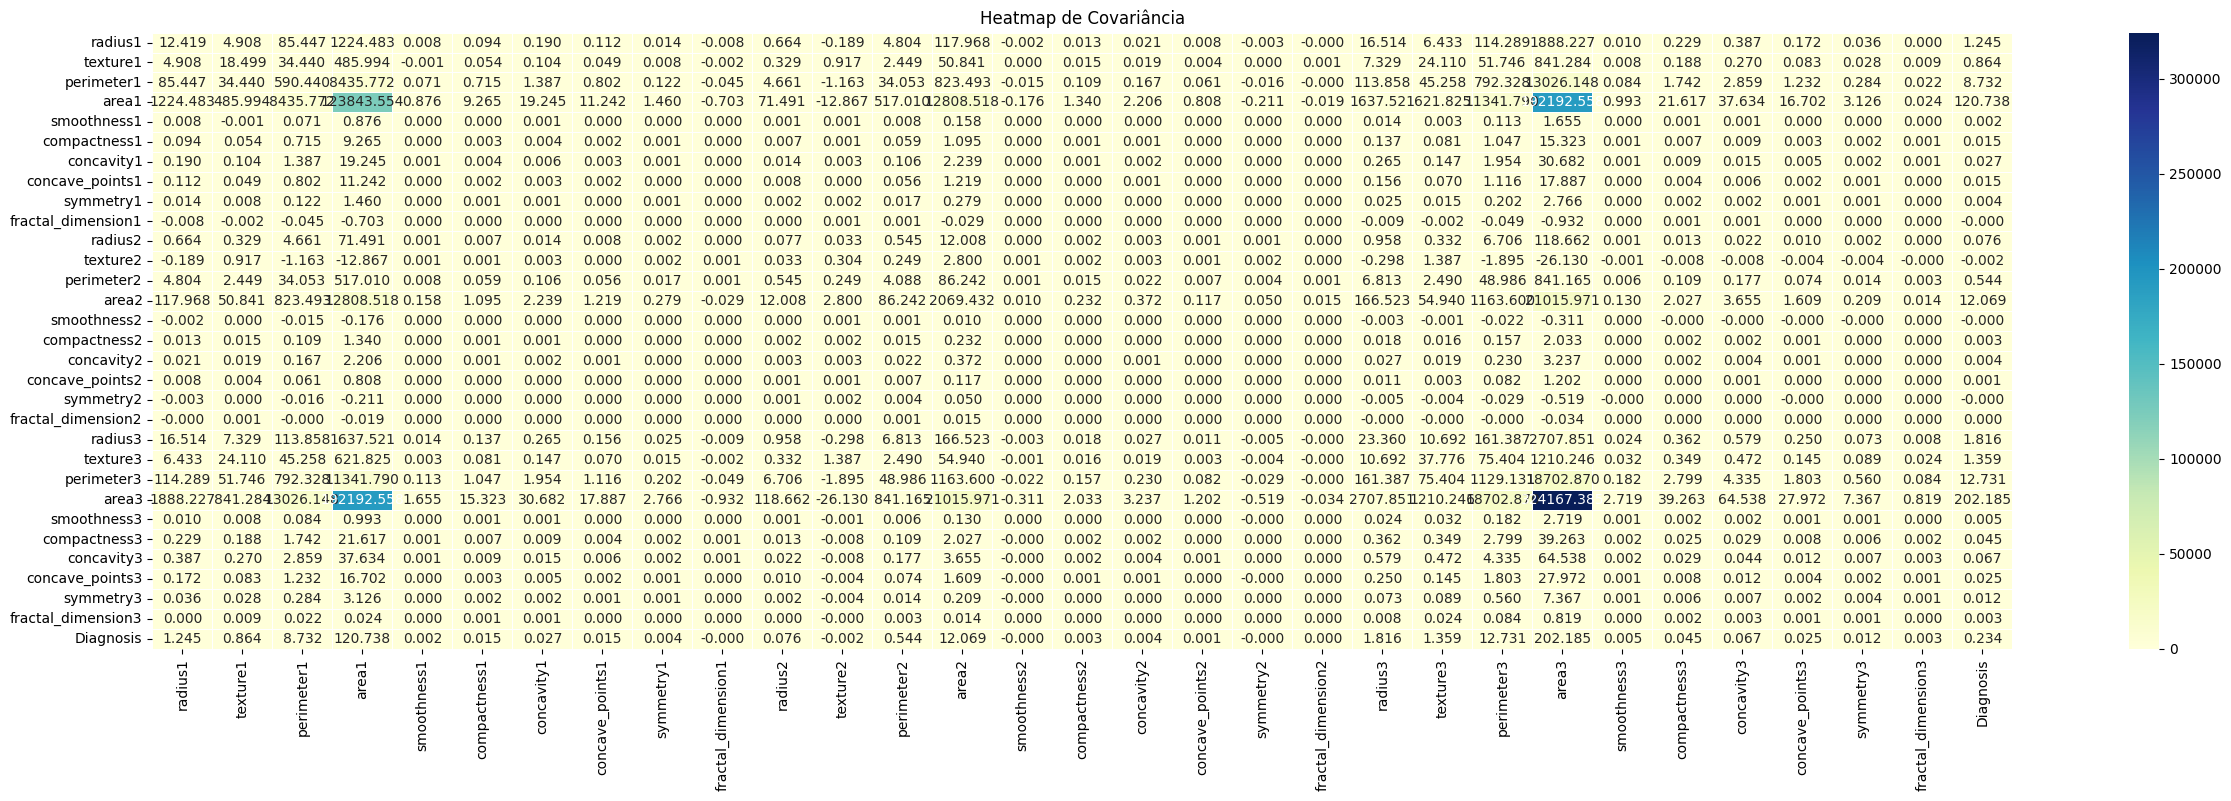

In [ ]:
df = pd.concat([X, y], axis=1)
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

plt.figure(figsize=(30,8))
sns.heatmap(df.cov(), annot=True, cmap='YlGnBu', fmt=".3f", linewidths=0.5)
plt.title("Heatmap de Covariância")
plt.show()

Podemos perceber que a **Matriz de Covariância** não retrata bem a relação entre os atributos. Isso se deve pelo fato de matrizes de covariância não serem as mais indicadas para dados multivariados por apresentarem grande sensibilidade a escala dos atributos. Por isso, em casos como esse, a **Matriz de Correlação** é a mais indicada.

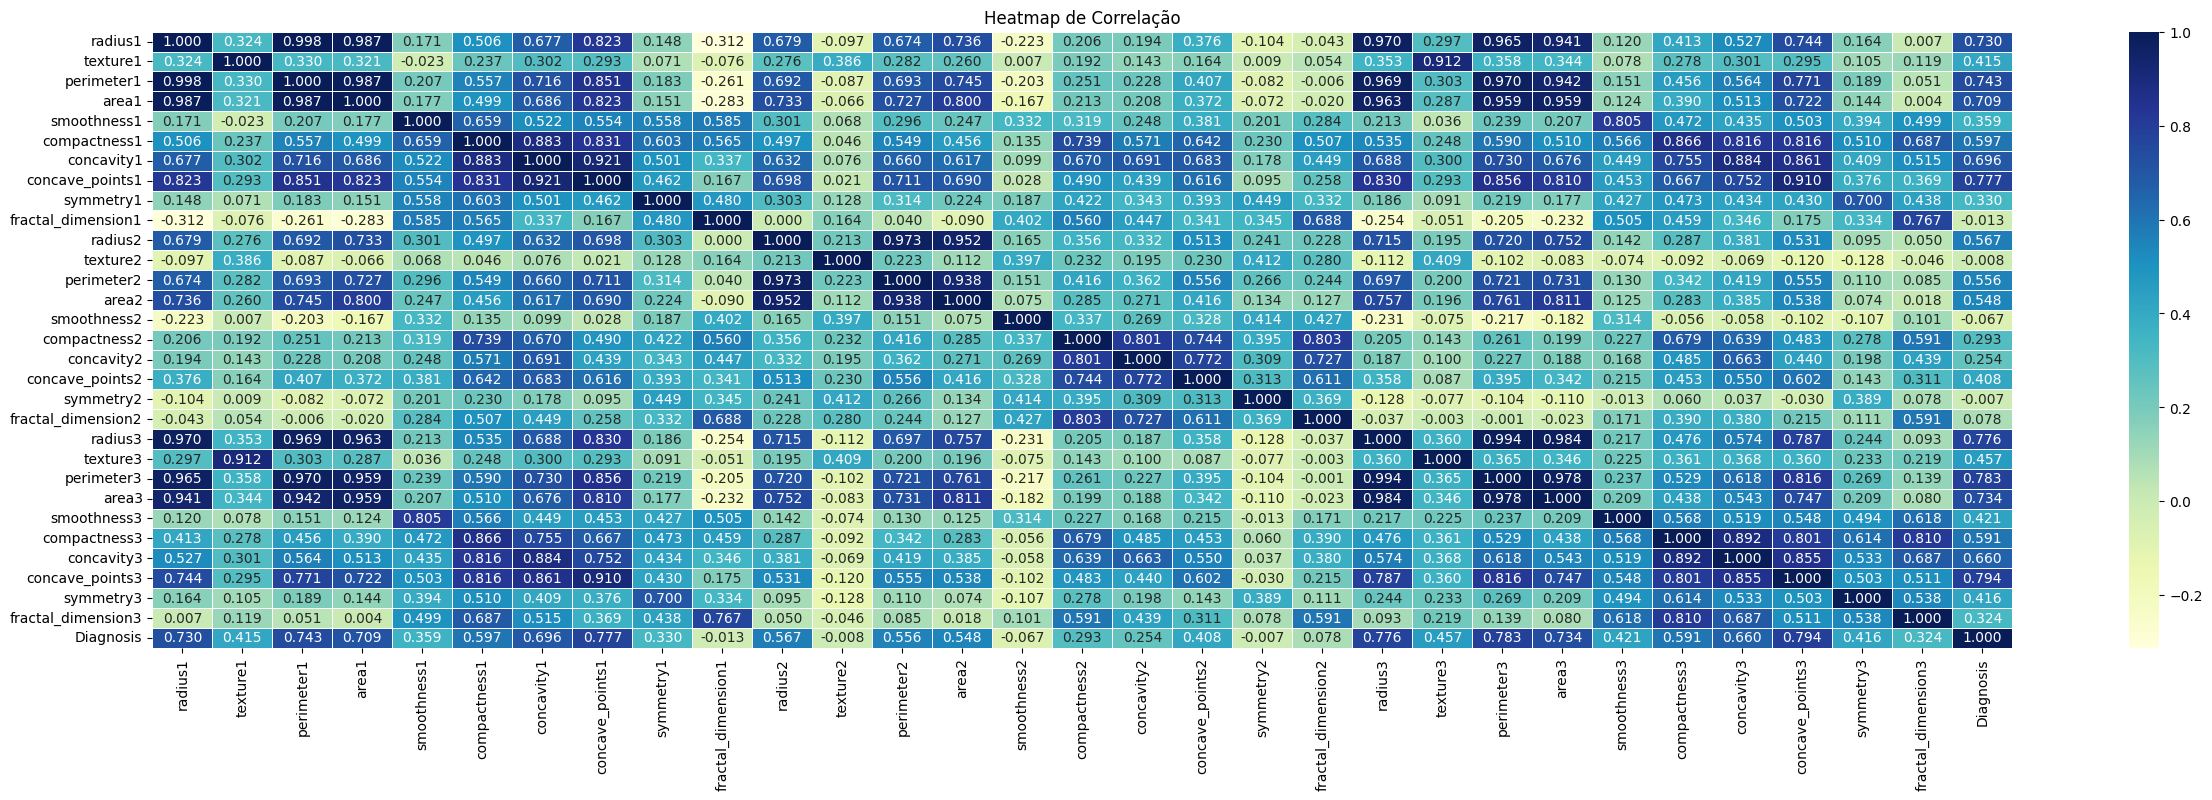

In [ ]:
plt.figure(figsize=(30,8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', fmt=".3f", linewidths=0.5)
plt.title("Heatmap de Correlação")
plt.show()

Podemos perceber que além da diagonal principal, alguns outros atributos também tem uma grande correlação positiva. Isso significa que o aumento do valor de um
deles é geralmente acompanhado por um aumento no valor do
outro e pode expor certa redundãncia nos dados.

Os atributos diferentes com **forte correlação positiva** (maior que 0.9) foram:
1. raio perímetro e área (1 e 3)
3. concavity1 e concave_points1
4. texture1 e texture3

## **f.** Trace boxplots dos atributos preditivos e identifique a presença ou não de outliers.

Como os valores dos atributos variam significativamente entre as classes (Maligno e Benigno) e, considerando que o conjunto de dados apresenta um **leve desbalanceamento** (aproximadamente 70% dos casos são benignos e 30% malignos), optamos por gerar também **boxplots segmentados por diagnóstico**. Essa abordagem permite visualizar melhor como as distribuições se comportam em cada grupo, facilitando a comparação entre os padrões específicos de cada classe.

Além disso, **ao separar por classe, conseguimos identificar mais facilmente a presença de outliers específicos**, que poderiam ser ofuscados em uma análise geral. Em tumores benignos por exemplo, a existência de uma area1 maior (destoante) pode ser um indicativo mais alarmante de outliers do que em tumores malignos onde a distribuição se concentra nesses valores maiores.

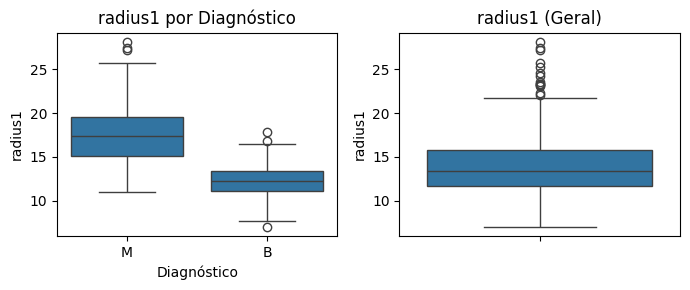

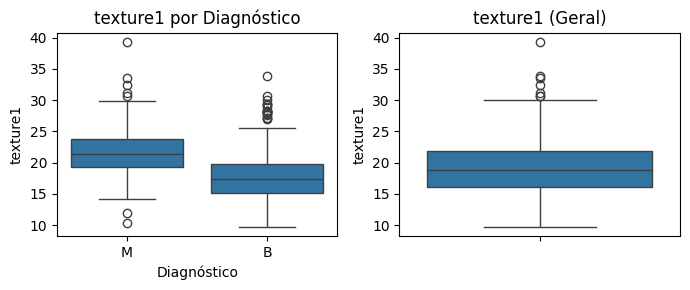

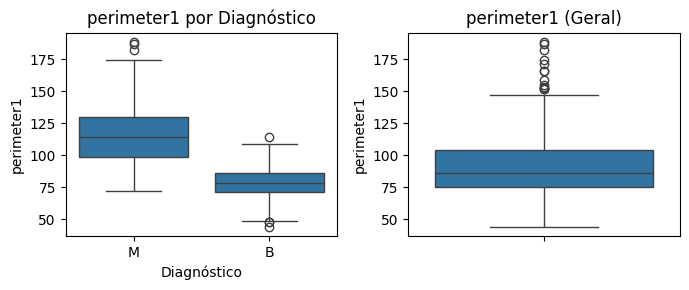

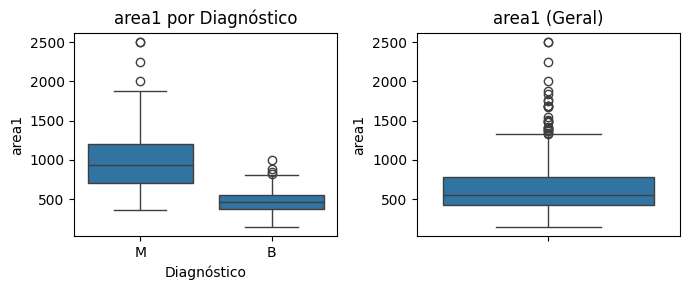

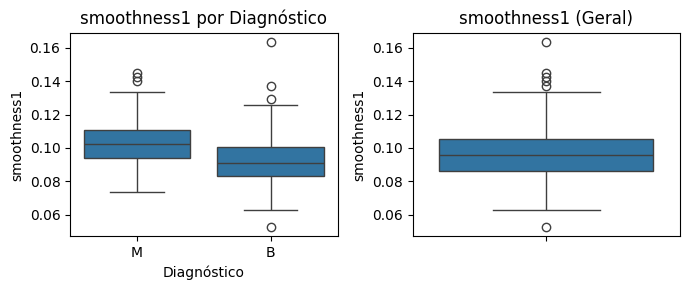

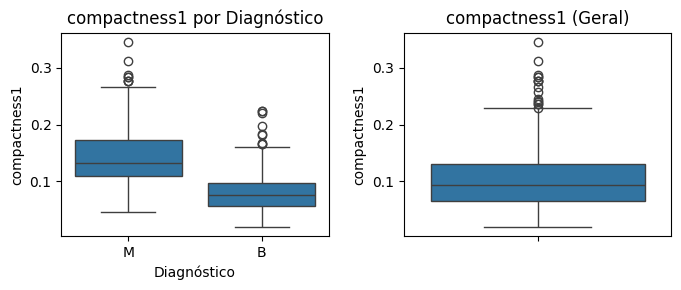

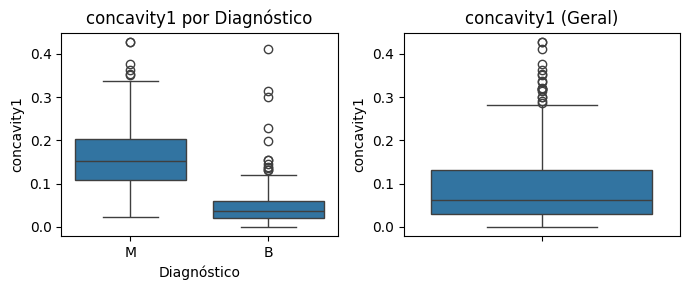

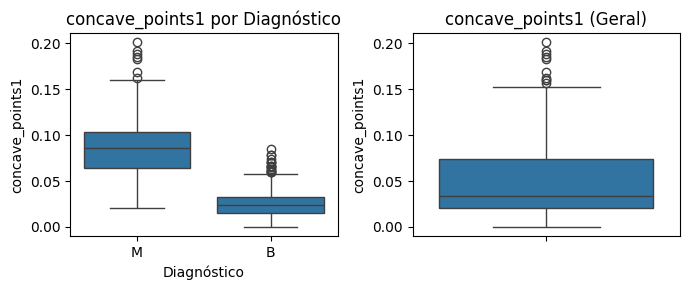

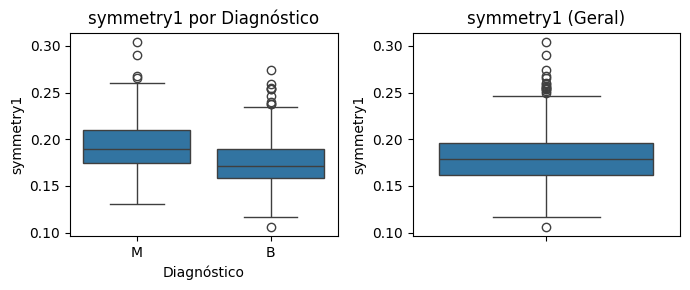

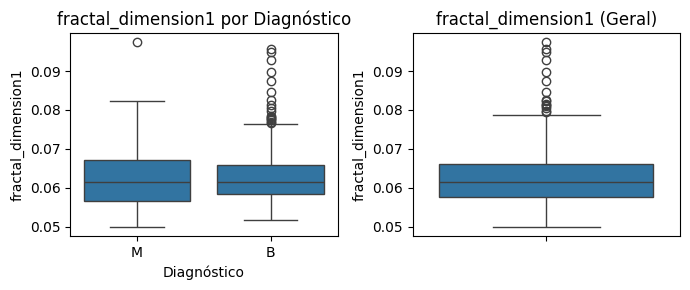

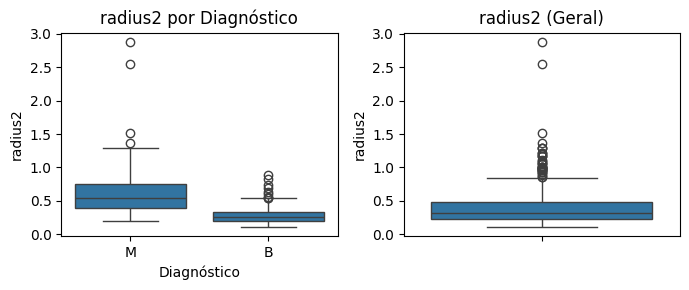

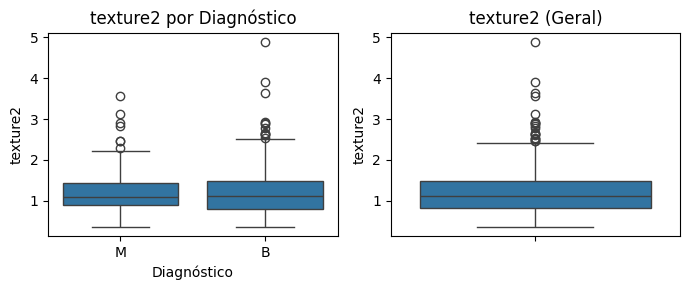

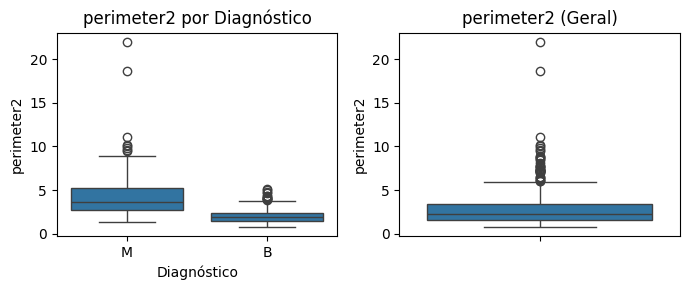

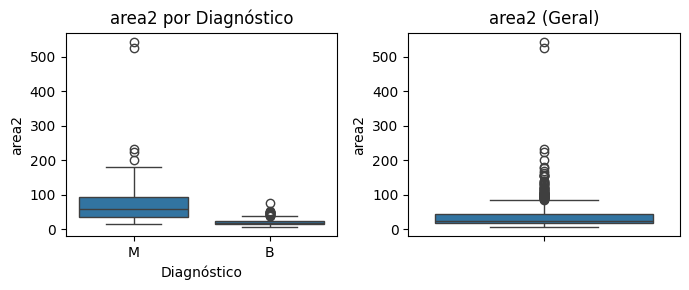

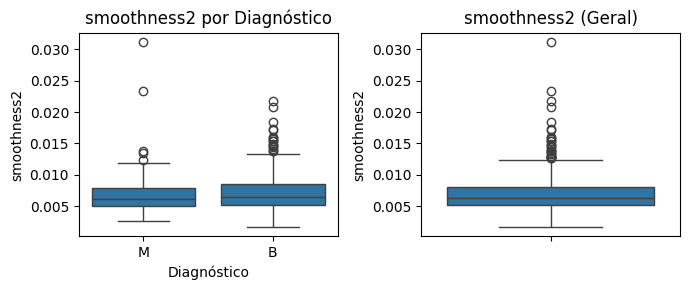

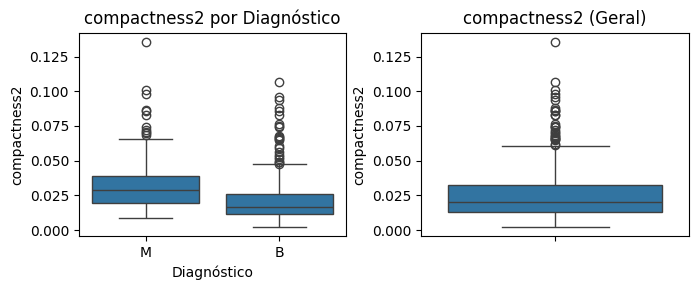

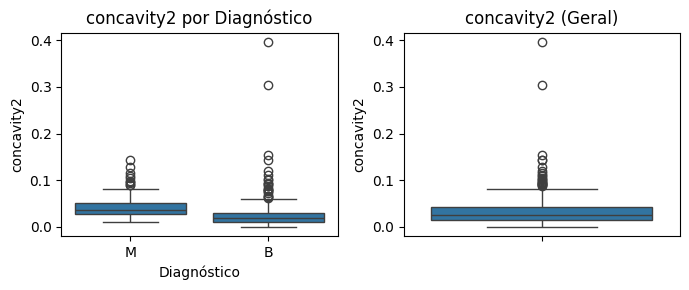

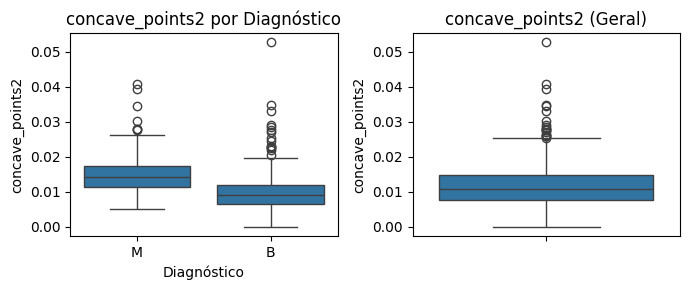

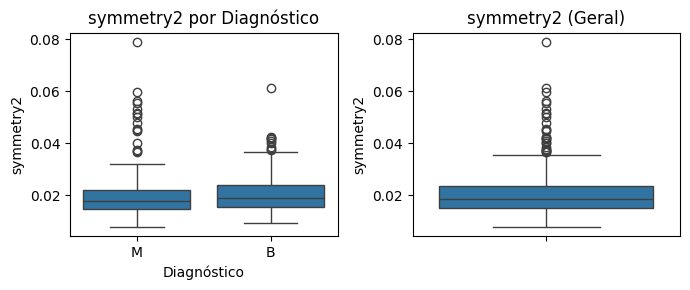

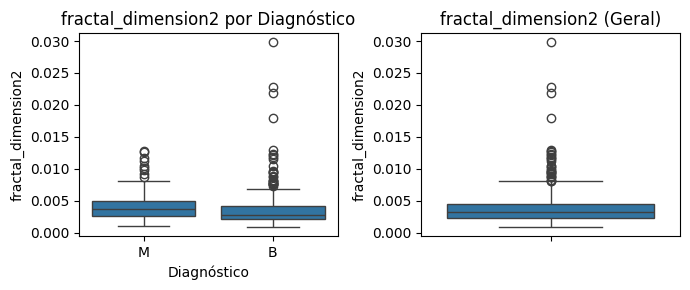

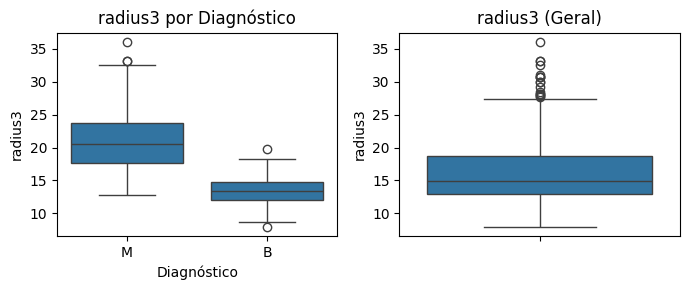

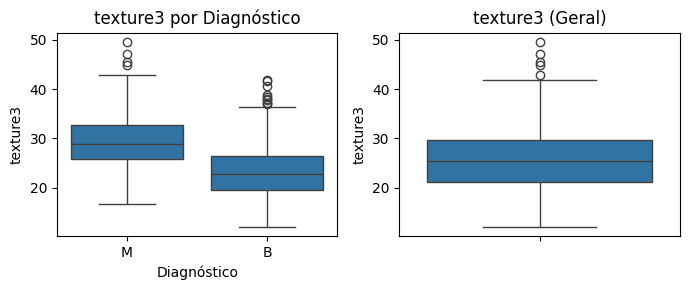

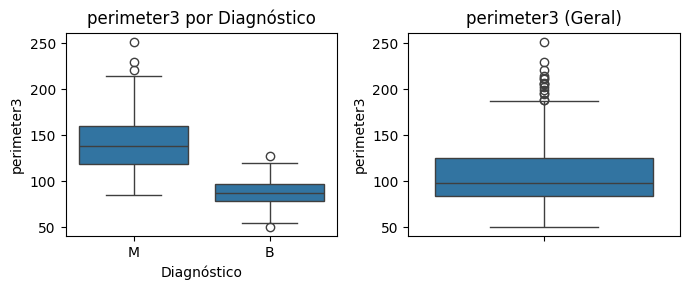

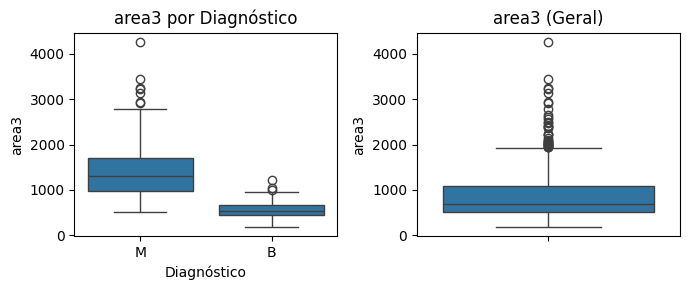

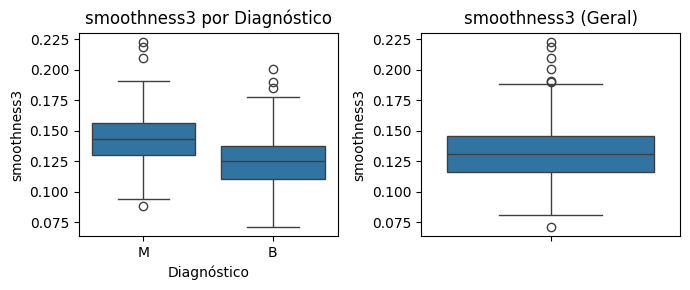

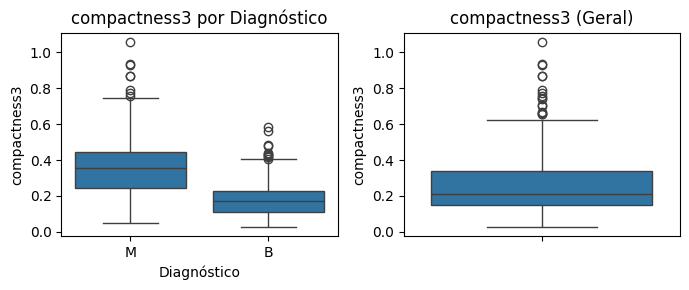

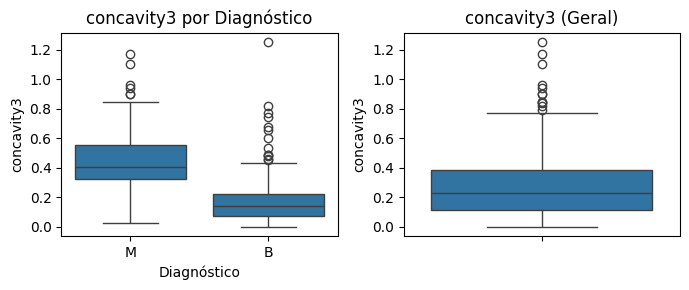

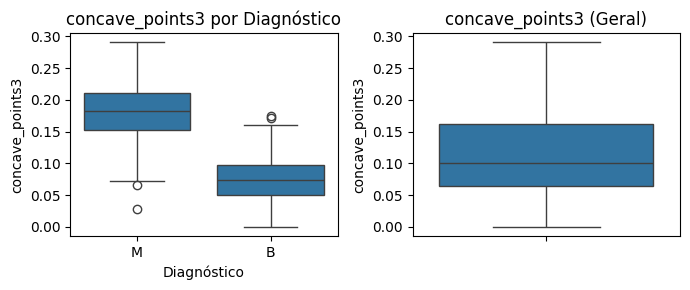

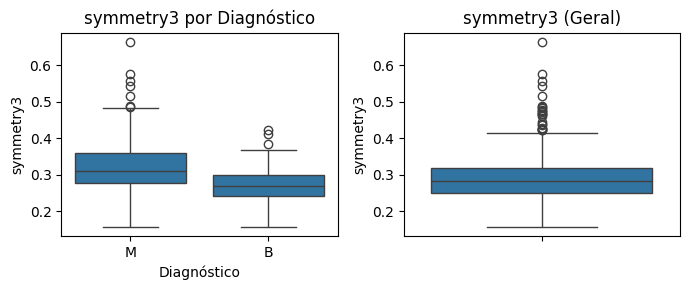

In [ ]:
df = pd.concat([X, y], axis=1)

for col in df.columns[:-2]:
    plt.figure(figsize=(7, 3))

    # Boxplot por diagnóstico
    plt.subplot(1, 2, 1)
    sns.boxplot(x='Diagnosis', y=col, data=df)
    plt.title(f"{col} por Diagnóstico")
    plt.xlabel("Diagnóstico")
    plt.ylabel(col)

    # Boxplot geral
    plt.subplot(1, 2, 2)
    sns.boxplot(y=col, data=df)
    plt.title(f"{col} (Geral)")
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()


## **g.** Plote histogramas dos atributos (compare seu comportamento com as medidas da estatatística tica descritiva, anteriormente calculadas) e interprete sua distribuição, **considerando as classes**.

A partir dos histogramas por classe (tumores benignos e malignos), é possível observar alguns padrões importantes que se alinham com as estatísticas descritivas analisadas anteriormente.

Em muitos atributos, os **valores mais altos de distribuição estão associados aos tumores malignos.** Isso significa que, em geral, tumores malignos tendem a ter características com valores maiores como raio, textura, concavidade e etc, o que os diferencia dos tumores benignos nos gráficos.

Além disso, **muitas distribuições apresentam cauda à direita** (assimetria positiva), o que indica a presença de alguns poucos valores muito altos. Esses valores extremos são, em grande parte, de tumores malignos, que representam **cerca de 30% do conjunto de dados**. Já que os tumores benignos são maioria (cerca de 70%), a forma geral da distribuição tende a refletir mais fortemente as características dos benignos, com picos concentrados em valores mais baixos.

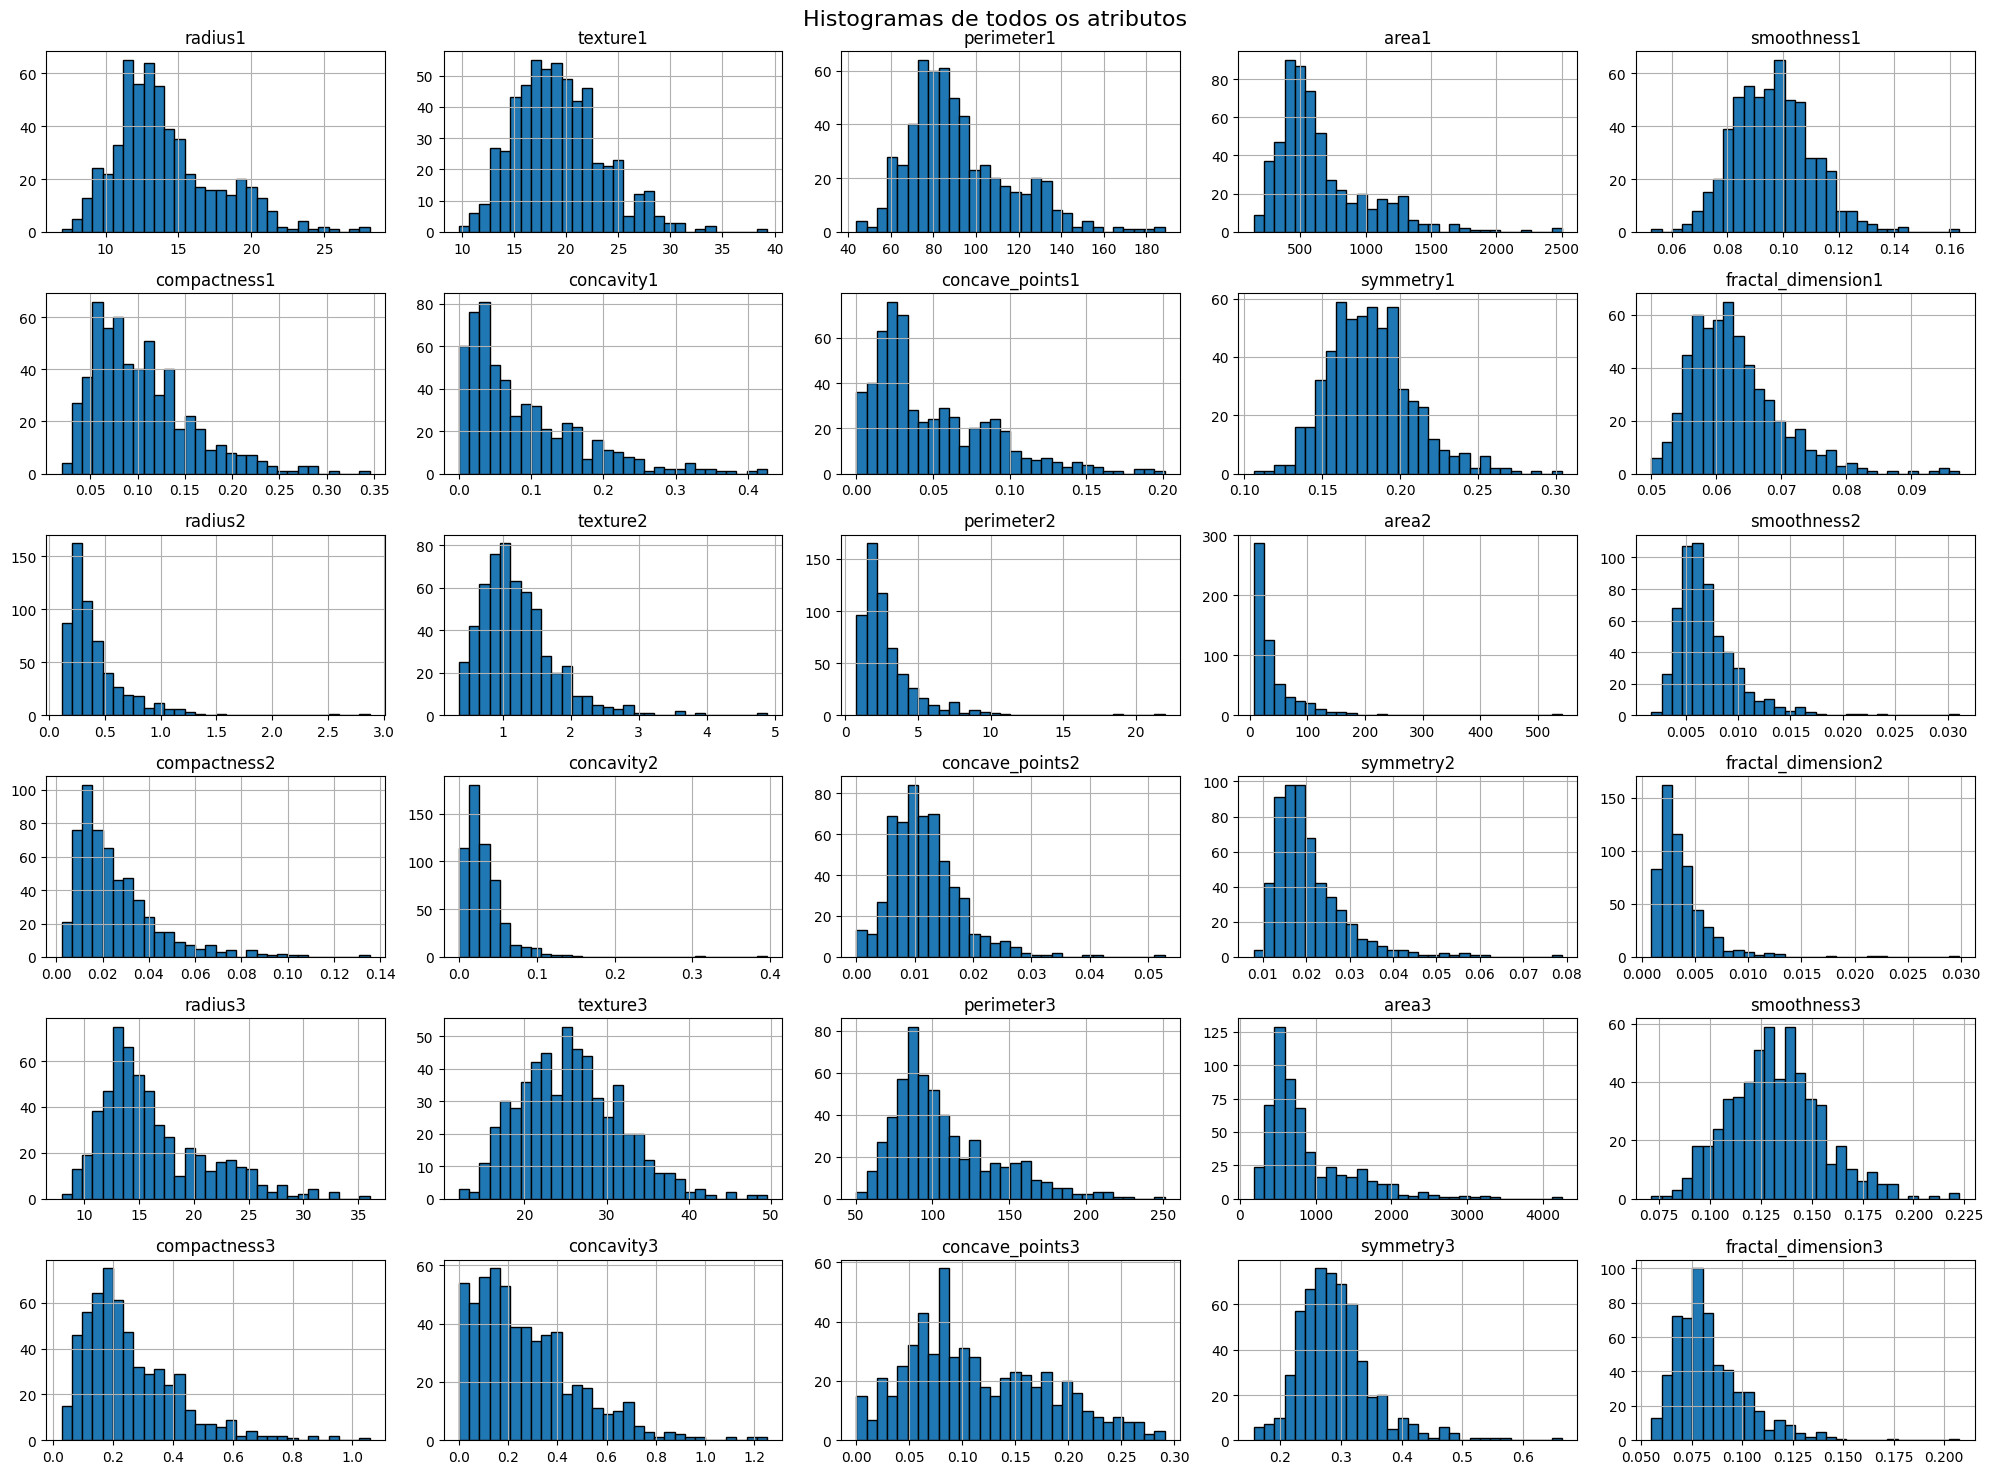

In [ ]:
X.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle("Histogramas de todos os atributos", fontsize=16)
plt.tight_layout()
plt.show()

Nos histogramas coloridos por classe (como no gráfico 2), **a parte rosa (tumores benignos) se concentra mais à esquerda**, ou seja, em valores menores. Por outro lado, **a parte azul (tumores malignos) aparece mais à direita**, nas regiões de valores mais altos, reforçando a diferença entre as duas classes e a necessidade de analisar essa distribuição de maneira separada.

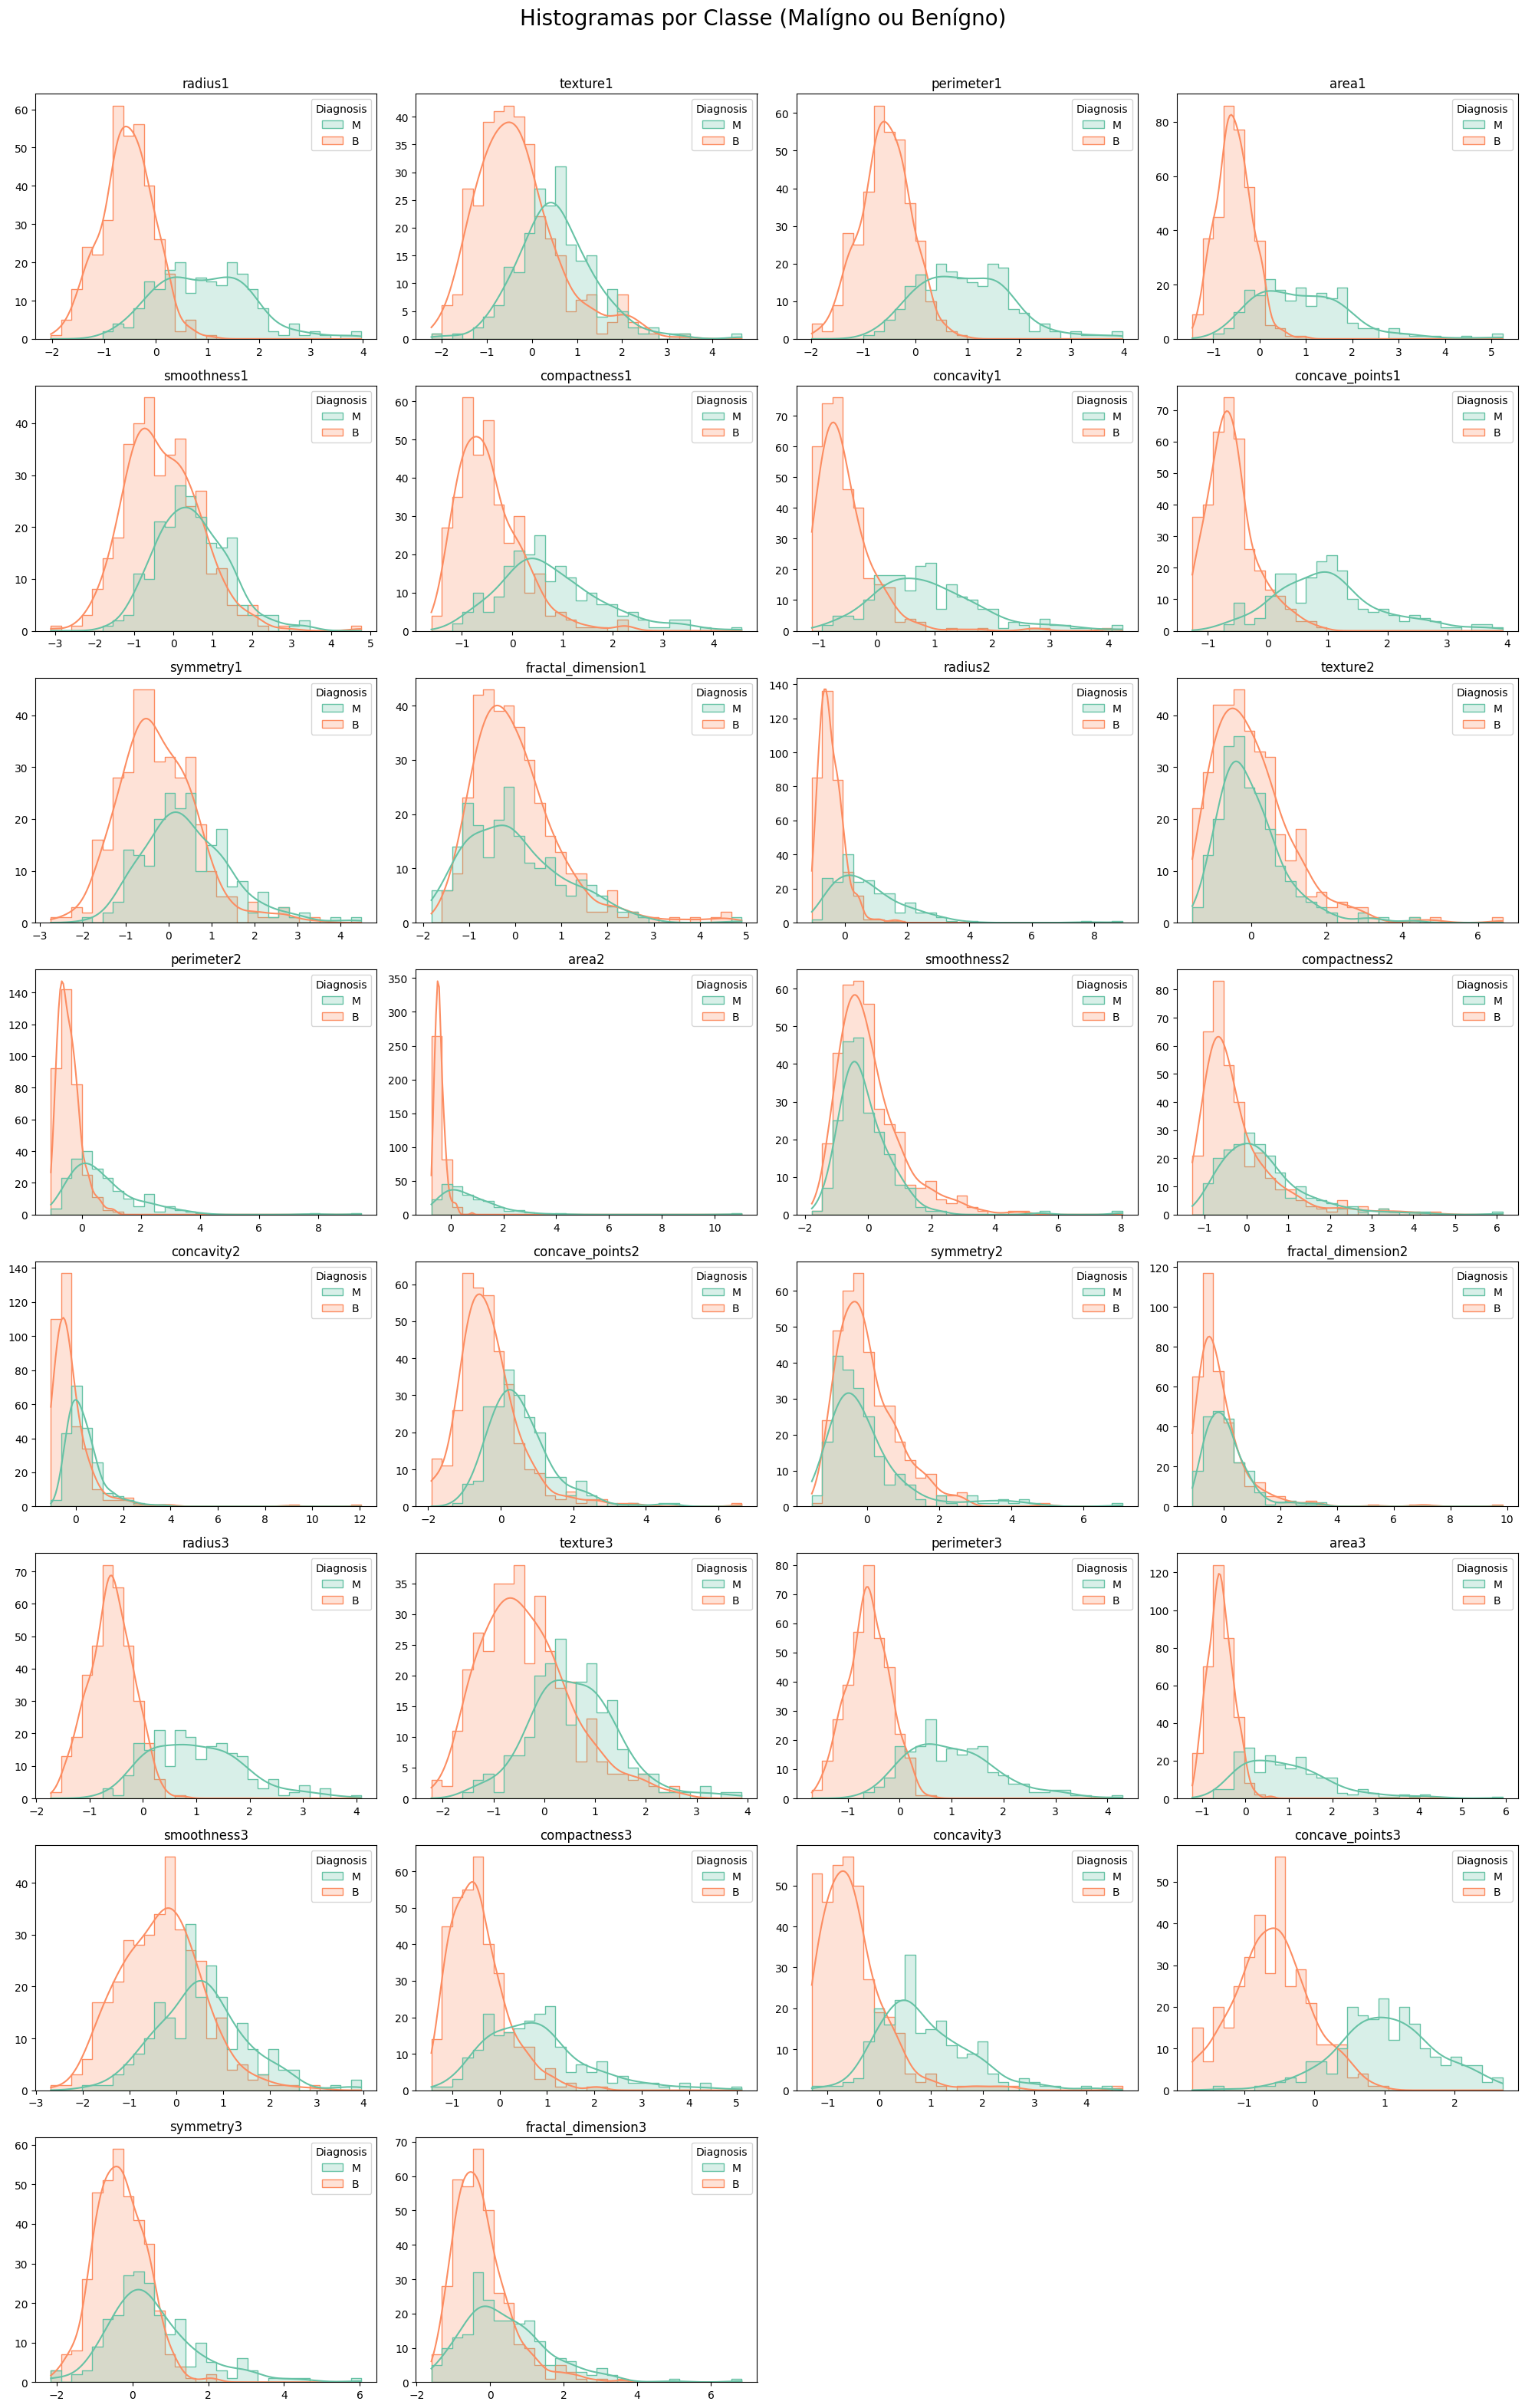

In [ ]:
target_col = 'Diagnosis'
features = X.columns

n_cols = 4
n_rows = (len(features) + n_cols - 1) // n_cols

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=df, x=feature, hue=target_col, bins=30, element='step', palette='Set2', kde=True)
    plt.title(feature)
    plt.xlabel('')
    plt.ylabel('')

plt.suptitle('Histogramas por Classe (Malígno ou Benígno)', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

 ## **h.** Promova uma transformação de dados consistente com o banco sob análise

A transformação escolhida foi a **padronização**, uma técnica que ajusta os dados para que todos os atributos tenham um valor central (média) igual a zero e um nível de espalhamento (desvio padrão) igual a um. Essa abordagem é escolhida para trata melhor a presença de outliers, mantendo a forma da distribuição dos dados e permitindo comparações mais equilibradas entre os atributos de diferentes escalas.


In [ ]:
df_norm = df.loc[:, df.columns != 'Diagnosis']
df_norm = (df_norm - df_norm.mean())/df_norm.std()
df = pd.concat([df_norm, df['Diagnosis']], axis=1)
df

radius1  texture1  perimeter1     area1  smoothness1  compactness1  \
0    1.096100 -2.071512    1.268817  0.983510     1.567087      3.280628   
1    1.828212 -0.353322    1.684473  1.907030    -0.826235     -0.486643   
2    1.578499  0.455786    1.565126  1.557513     0.941382      1.052000   
3   -0.768233  0.253509   -0.592166 -0.763792     3.280667      3.399917   
4    1.748758 -1.150804    1.775011  1.824624     0.280125      0.538866   
..        ...       ...         ...       ...          ...           ...   
564  2.109139  0.720838    2.058974  2.341795     1.040926      0.218868   
565  1.703356  2.083301    1.614511  1.722326     0.102368     -0.017817   
566  0.701667  2.043775    0.672084  0.577445    -0.839745     -0.038646   
567  1.836725  2.334403    1.980781  1.733693     1.524426      3.269267   
568 -1.806811  1.220718   -1.812793 -1.346604    -3.109349     -1.149741   

     concavity1  concave_points1  symmetry1  fractal_dimension1  ...  \
0      2.650542         2.530249   2.215566            2.253764  ...   
1     -0.023825         0.547662   0.001391           -0.867889  ...   
2      1.362280         2.035440   0.938859           -0.397658  ...   
3      1.914213         1.450431   2.864862            4.906602  ...   
4      1.369806         1.427237  -0.009552           -0.561956  ...   
..          ...              ...        ...                 ...  ...   
564    1.945573         2.318924  -0.312314           -0.930209  ...   
565    0.692434         1.262558  -0.217473           -1.057681  ...   
566    0.046547         0.105684  -0.808406           -0.894800  ...   
567    3.294046         2.656528   2.135315            1.042778  ...   
568   -1.113893        -1.260710  -0.819349           -0.560539  ...   

     texture3  perimeter3     area3  smoothness3  compactness3  concavity3  \
0   -1.358098    2.301575  1.999478     1.306537      2.614365    2.107672   
1   -0.368879    1.533776  1.888827    -0.375282     -0.430066   -0.146620   
2   -0.023953    1.346291  1.455004     0.526944      1.081980    0.854222   
3    0.133866   -0.249720 -0.549538     3.391291      3.889975    1.987839   
4   -1.465481    1.337363  1.219651     0.220362     -0.313119    0.612640   
..        ...         ...       ...          ...           ...         ...   
564  0.117596    1.751022  2.013529     0.378033     -0.273077    0.663928   
565  2.045599    1.420690  1.493644    -0.690623     -0.394473    0.236365   
566  1.373645    0.578492  0.427529    -0.808876      0.350427    0.326479   
567  2.235958    2.301575  1.651717     1.429169      3.901415    3.194794   
568  0.763518   -1.431475 -1.074867    -1.857384     -1.206491   -1.304683   

     concave_points3  symmetry3  fractal_dimension3  Diagnosis  
0           2.294058   2.748204            1.935312          M  
1           1.086129  -0.243675            0.280943          M  
2           1.953282   1.151242            0.201214          M  
3           2.173873   6.040726            4.930672          M  
4           0.728618  -0.867590           -0.396751          M  
..               ...        ...                 ...        ...  
564         1.627719  -1.358963           -0.708467          M  
565         0.733182  -0.531387           -0.973122          M  
566         0.413705  -1.103578           -0.318129          M  
567         2.287972   1.917396            2.217684          M  
568        -1.743529  -0.048096           -0.750546          B  

[569 rows x 31 columns]

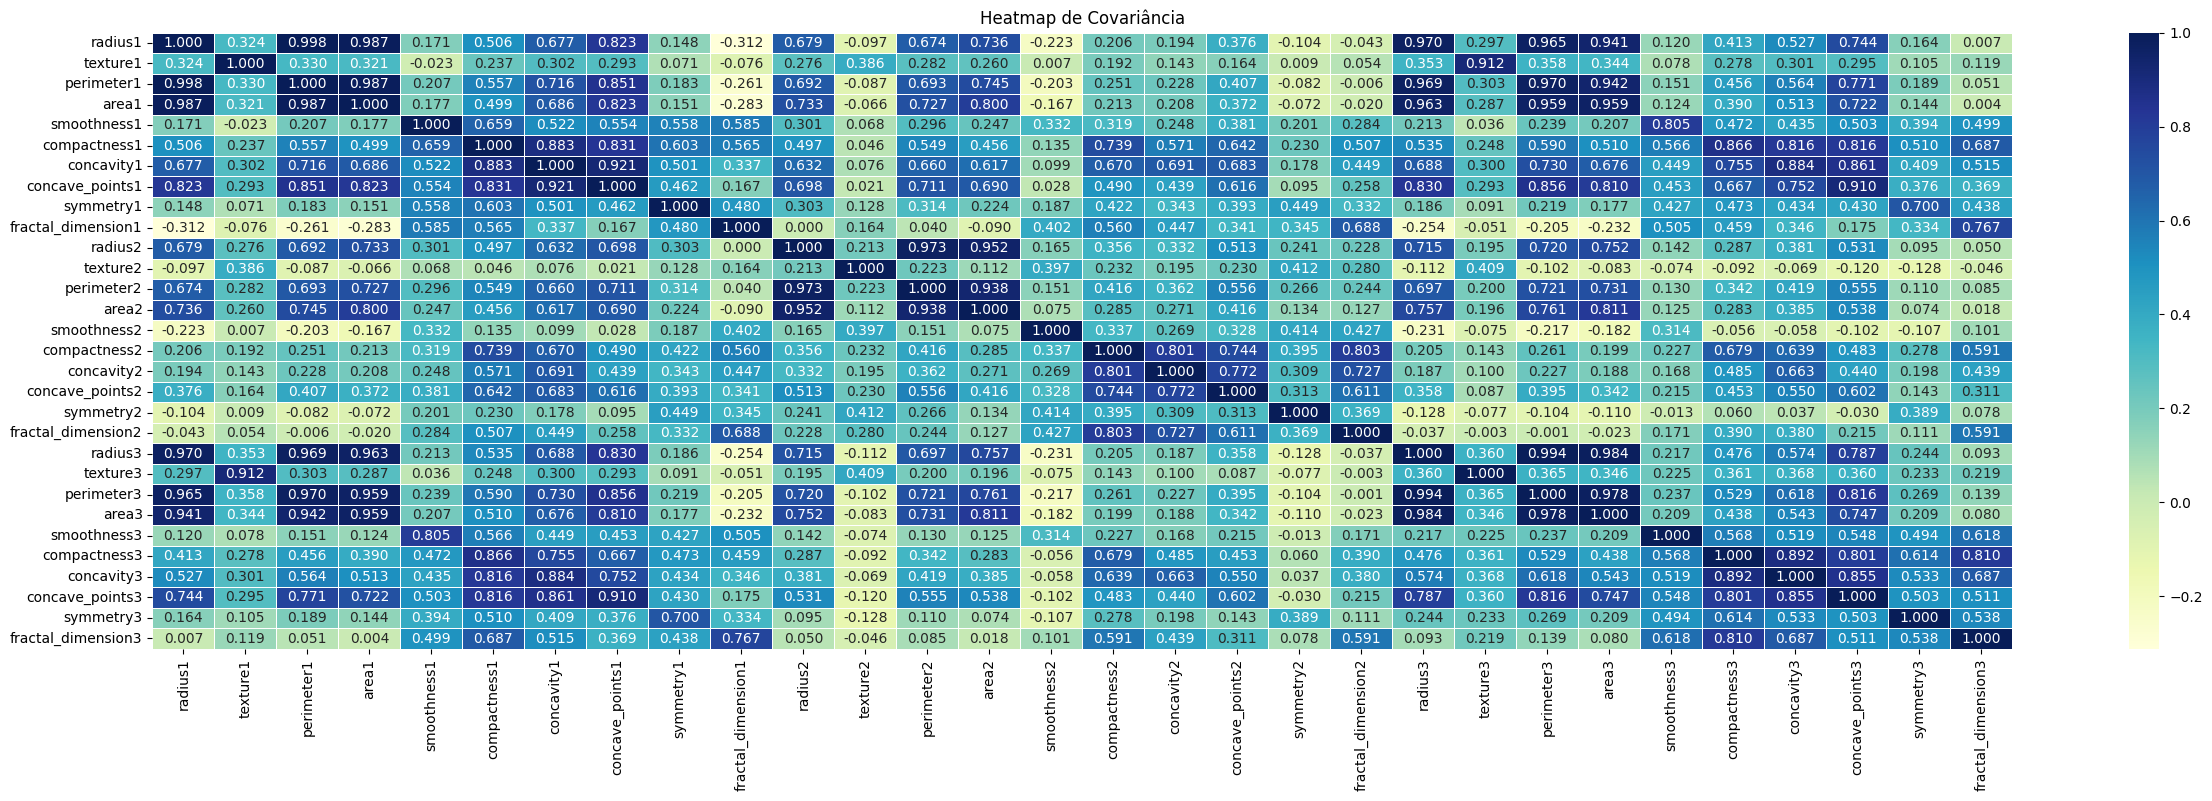

In [ ]:
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

plt.figure(figsize=(30,8))
sns.heatmap(df.loc[:, df.columns != 'Diagnosis'].cov(), annot=True, cmap='YlGnBu', fmt=".3f", linewidths=0.5)
plt.title("Heatmap de Covariância")
plt.show()

## **g.** Utilize a análise de componentes principais (PCA) para gerar gráficos no espaço de atributos.

<Figure size 1200x600 with 0 Axes>

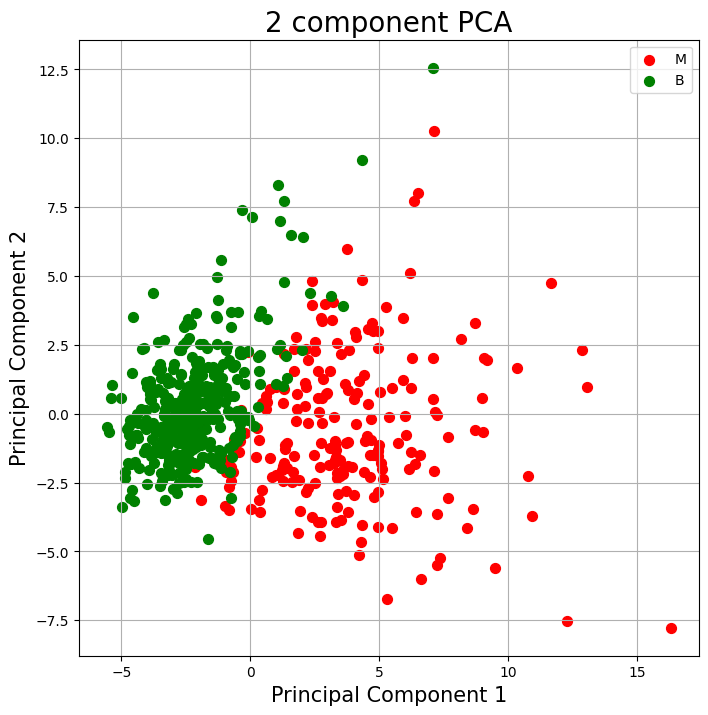

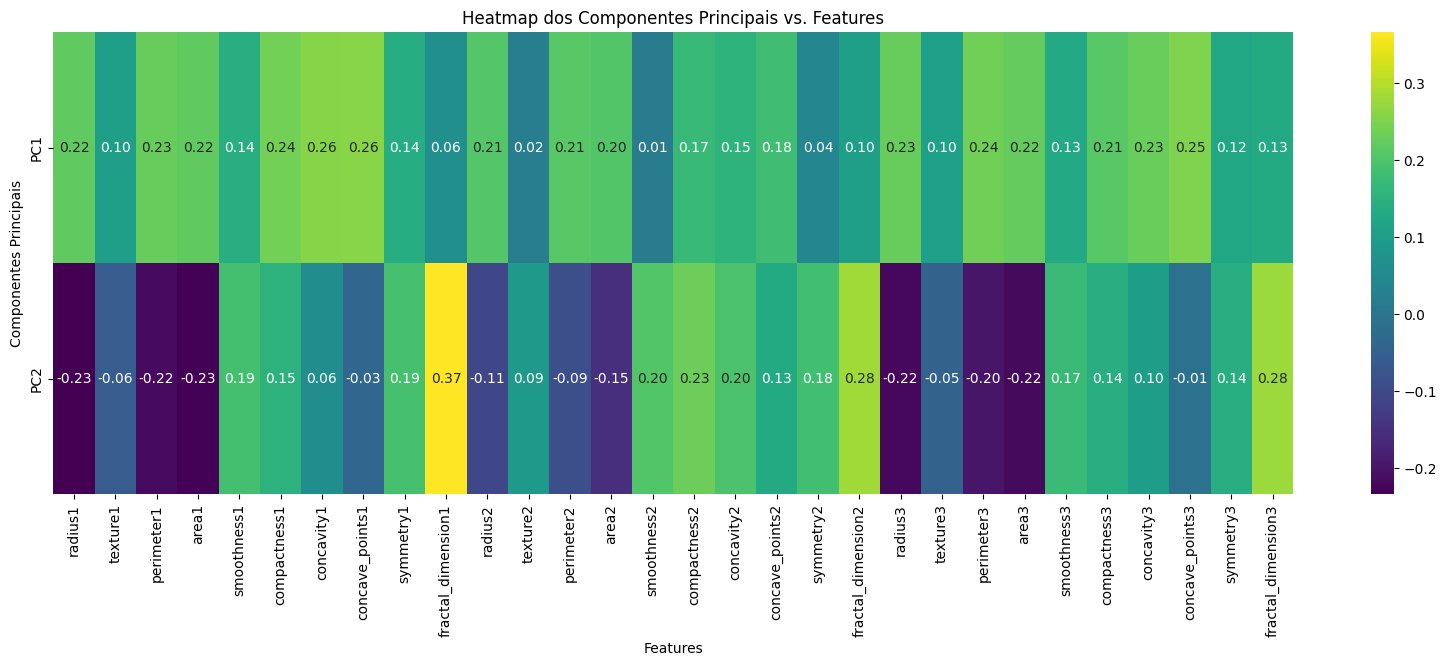

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_norm)

principalDf = pd.DataFrame(data=X_pca, columns=['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df['Diagnosis']], axis=1)

plt.figure(figsize=(12, 6))
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = ['M', 'B']
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Diagnosis'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c=color,
               s=50)
ax.legend(targets)
ax.grid()
plt.show()

heatmap_data = pd.DataFrame(pca.components_, columns=df_norm.columns, index=['PC1', 'PC2'])

plt.figure(figsize=(20, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title('Heatmap dos Componentes Principais vs. Features')
plt.xlabel('Features')
plt.ylabel('Componentes Principais')
plt.show()

In [ ]:
variancia_explicada = pca.explained_variance_ratio_

print("Variância explicada por PC1:", variancia_explicada[0])
print("Variância explicada por PC2:", variancia_explicada[1])

variancia_total = sum(variancia_explicada)
print("Variância total explicada:", variancia_total)

Variância explicada por PC1: 0.44272025607526366
Variância explicada por PC2: 0.18971182044033072
Variância total explicada: 0.6324320765155944


O grafico componentes principais nos mostra uma claara divisão entre as classes de tumores benignos e malignos para os objetos, mostrando que o PCA foi bem sucedido em encontrar componentes que destacam as diferenças entre as classes. Fica claro também que na direção de PC1 está a variança que mais se relaciona na separação entre as classes

No heatmap dos componentes principais vs Features vemos que os atributos radius, perimeter, compactness, concavity e concave_points tem uma correlação maior com PC1 logo são os mais relevantes para explicar a variação que pode nos ajudar a classificar o objeto. Também podemos ver que o fractal_dimension tem menos importancia na variança do PC1 e é o que mais influencia no PC2, isso pode nos levar a crer que ele será pouco relevante para classificação dos tumores.